# 模型评估指标 - 以鸢尾花数据为例

### 数据集引入、模型训练

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 导入数据集
dataset = load_iris()
data = dataset.data
target = dataset.target
features = dataset.feature_names

X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2,random_state=1)

model  = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

## 准确率

In [2]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,model.predict(X_test))

0.9666666666666667

## 精确率和召回率

In [3]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,model.predict(X_test)))
confusion_matrix(y_test,model.predict(X_test))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [4]:
print(set(target))

{0, 1, 2}


#### 精确率precision_score和召回率recall_score

In [6]:
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score

f1_score(y_test,model.predict(X_test),average='weighted')

0.9672820512820512

In [7]:
y_pred = model.predict(X_test)

## ROC和AUC

- ROC曲线（Receiver Operating Characteristic Curve）是一种用于评估分类器性能的图形表示方法，它通过绘制真正例率（TPR）与假正例率（FPR）之间的关系来展示分类器在不同阈值下的性能。

- AUC值（Area Under the Curve）是一个介于0和1之间的数值，用于衡量ROC曲线下的面积大小，值越大表示分类器性能越好。

这段代码是用于计算ROC曲线和AUC值的。ROC曲线（Receiver Operating Characteristic Curve）是一种用于评估分类器性能的图形表示方法，它通过绘制真正例率（TPR）与假正例率（FPR）之间的关系来展示分类器在不同阈值下的性能。AUC值（Area Under the Curve）是一个介于0和1之间的数值，用于衡量ROC曲线下的面积大小，值越大表示分类器性能越好。

代码解释：

导入roc_auc_score和roc_curve函数。

使用roc_curve函数计算FPR、TPR和阈值。其中，y_test是测试集的真实标签，y_pred是分类器预测的概率或决策值，pos_label=2表示正类标签为2。

打印FPR、TPR和阈值。

使用roc_auc_score函数计算AUC值。其中，第一个参数是真实标签，第二个参数是预测概率或决策值。


In [8]:

# 导入roc_auc_score和roc_curve函数。
from sklearn.metrics import roc_auc_score,roc_curve
# 使用roc_curve函数计算FPR、TPR和阈值。其中，y_test是测试集的真实标签，y_pred是分类器预测的概率或决策值，pos_label=2表示正类标签为2。
fpr,tpr,thresholds = roc_curve(y_test,y_pred,pos_label=2)
print(fpr)
print(tpr)
print(thresholds)

# 打印FPR、TPR和阈值。

# 使用roc_auc_score函数计算AUC值。其中，第一个参数是真实标签，第二个参数是预测概率或决策值。

[0.         0.04166667 0.54166667 1.        ]
[0. 1. 1. 1.]
[inf  2.  1.  0.]


In [11]:
y_test

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2])

In [10]:
model.predict_proba(X_test)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [12]:
import pandas as pd

column_name = ['真实标签','模型输出概率']
datasets = [['p',0.9],['p',0.8],['n',0.7],['p',0.6],
           ['p',0.55],['p',0.54],['n',0.53],['n',0.52],
           ['p',0.51],['n',0.505],['p',0.4],['p',0.39],
           ['p',0.38],['n',0.37],['n',0.36],['n',0.35],
           ['p',0.34],['n',0.33],['p',0.30],['n',0.1]]

data = pd.DataFrame(datasets,index = [i for i in range(1,21,1)],columns=column_name)
print(data)

   真实标签  模型输出概率
1     p   0.900
2     p   0.800
3     n   0.700
4     p   0.600
5     p   0.550
6     p   0.540
7     n   0.530
8     n   0.520
9     p   0.510
10    n   0.505
11    p   0.400
12    p   0.390
13    p   0.380
14    n   0.370
15    n   0.360
16    n   0.350
17    p   0.340
18    n   0.330
19    p   0.300
20    n   0.100


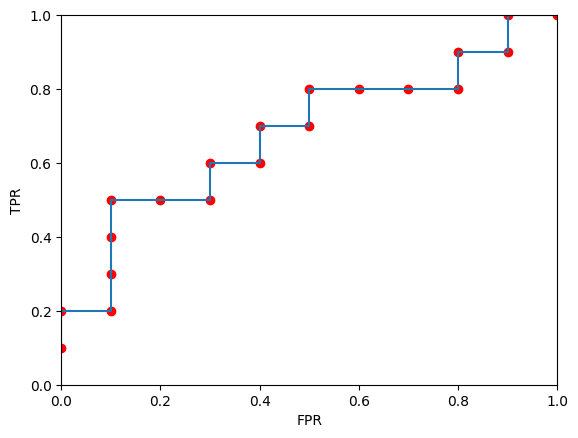

In [13]:
#可视化
points = {0.1:[1,1],0.3:[0.9,1],0.33:[0.9,0.9],0.34:[0.8,0.9],0.35:[0.8,0.8],
        0.36:[0.7,0.8],0.37:[0.6,0.8],0.38:[0.5,0.8],0.39:[0.5,0.7],0.40:[0.4,0.7],
        0.505:[0.4,0.6],0.51:[0.3,0.6],0.52:[0.3,0.5],0.53:[0.2,0.5],0.54:[0.1,0.5],
        0.55:[0.1,0.4],0.6:[0.1,0.3],0.7:[0.1,0.2],0.8:[0,0.2],0.9:[0,0.1]}
X = []
Y = []
for value in points.values():
        X.append(value[0])
        Y.append(value[1])

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X,Y,c = 'r',marker = 'o')
plt.plot(X,Y)

plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()